In [ ]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from datetime import timedelta
from pandas import datetime

In [2]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [30]:
df=pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/catfish.csv',index_col=0,parse_dates=True,date_parser=parser)

In [31]:
df.head()
df

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


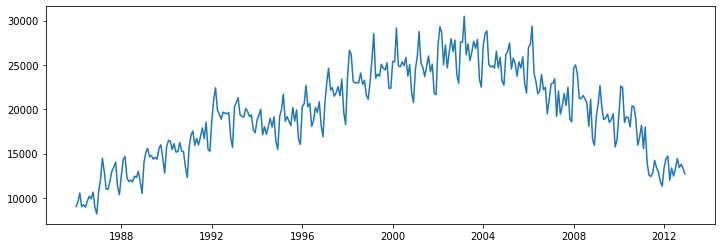

In [32]:
plt.figure(figsize=(12,4))
plt.plot(df)


In [33]:
#To check the stationarity of data

In [34]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#tags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adfuller_test(df['Total'])

ADF Test Statistic : -1.5899031233340133
p-value : 0.48866351571884103
#tags Used : 14
Number of Observations Used : 309
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [36]:
#take a difference to make it stationary

In [44]:
df['first difference']=df['Total']-df['Total'].shift(1)
df.dropna(inplace=True)

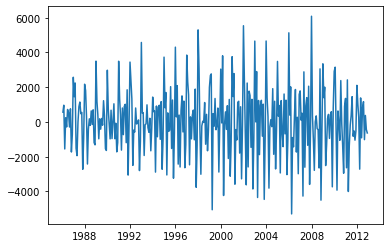

In [45]:
plt.plot(df['first difference'])

# acf

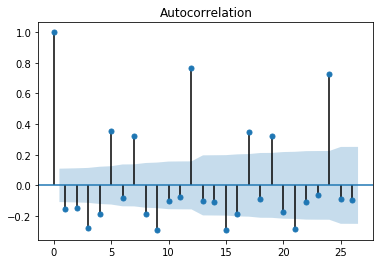

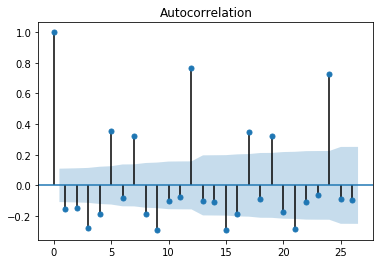

In [46]:
plot_acf(df['first difference'].dropna())


# START WITH MA(1)

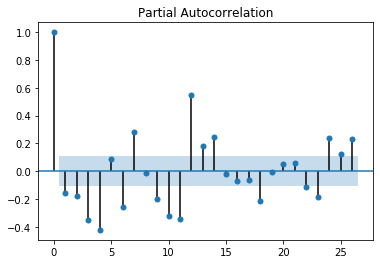

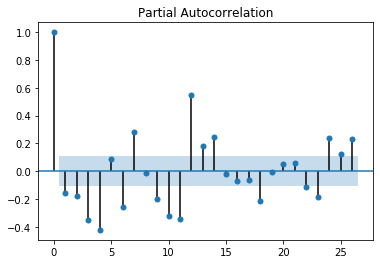

In [47]:
plot_pacf(df['first difference'])

In [54]:
trainend=datetime(2003,1,1)
testend=datetime(2004,12,1)
traindata=firstdiff[:trainend]
testdata=firstdiff[trainend+timedelta(days=1):testend]

In [55]:
traindata.shape



(205,)

In [58]:
model=ARMA(testdata,order=(4,1))
modelfit=model.fit()

C:\Users\JESAL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [59]:
print(modelfit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                   23
Model:                     ARMA(4, 1)   Log Likelihood                -200.549
Method:                       css-mle   S.D. of innovations           1365.339
Date:                Thu, 20 Aug 2020   AIC                            415.099
Time:                        13:53:40   BIC                            423.047
Sample:                    02-01-2003   HQIC                           417.098
                         - 12-01-2004                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -181.1930    123.006     -1.473      0.141    -422.280      59.894
ar.L1.Total    -0.9477      0.154     -6.171      0.000      -1.249      -0.647
ar.L2.Total    -0.5835      0.195     -2.994    

In [60]:
#get prediction start and end
startpred=testdata.index[0]
endpred=testdata.index[-1]


In [61]:
prediction=modelfit.predict(start=startpred,end=endpred)
residuals=testdata-prediction

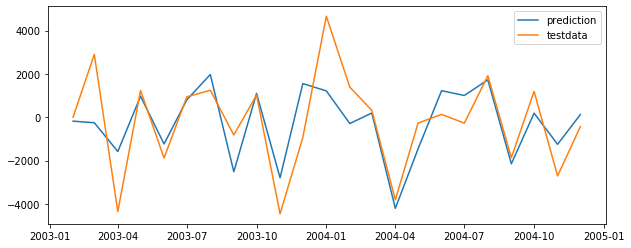

In [62]:
plt.figure(figsize=(10,4))
#plt.plot(residuals)
plt.plot(prediction)
plt.plot(testdata)
plt.legend(('prediction','testdata'))